In [1]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "dataset_source.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df_info = df.info()
df_head = df.head()


df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   injuries_direct   761 non-null    int64  
 1   deaths_direct     761 non-null    int64  
 2   event_latitude    761 non-null    float64
 3   event_longitude   761 non-null    float64
 4   event_range       761 non-null    float64
 5   event_type        761 non-null    object 
 6   event_begin_time  761 non-null    object 
 7   event_end_time    761 non-null    object 
 8   damage_property   761 non-null    int64  
 9   source            761 non-null    object 
 10  rn                761 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 65.5+ KB


,injuries_direct,deaths_direct,event_latitude,event_longitude,event_range,event_type,event_begin_time,event_end_time,damage_property,source,rn
count,761.000000,761.000000,761.000000,761.000000,761.000000,761,761,761,7.610000e+02,761,761.000000
unique,NaN,NaN,NaN,NaN,NaN,4,449,449,NaN,30,NaN
top,NaN,NaN,NaN,NaN,NaN,flash flood,2024-07-10T21:30:00,2023-01-01T23:59:00,NaN,NWS Storm Survey,NaN
freq,NaN,NaN,NaN,NaN,NaN,200,10,13,NaN,223,NaN
mean,2.721419,0.629435,35.747277,-89.650005,2.655440,NaN,NaN,NaN,1.545455e+07,NaN,96.374507
std,6.361370,1.299545,6.099935,17.587892,3.083233,NaN,NaN,NaN,1.071591e+08,NaN,56.148045
min,0.000000,0.000000,7.360600,-124.120000,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,1.000000
25%,0.000000,0.000000,33.000000,-97.096600,0.910000,NaN,NaN,NaN,0.000000e+00,NaN,48.000000
50%,1.000000,0.000000,36.180000,-89.150000,1.820000,NaN,NaN,NaN,1.500000e+04,NaN,96.000000
75%,2.000000,1.000000,39.087400,-81.810000,3.150000,NaN,NaN,NaN,8.500000e+05,NaN,143.000000


In [3]:
# Load the dataset
file_path = "dataset_source.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df_info = df.info()
df_head = df.head()


df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   injuries_direct   761 non-null    int64  
 1   deaths_direct     761 non-null    int64  
 2   event_latitude    761 non-null    float64
 3   event_longitude   761 non-null    float64
 4   event_range       761 non-null    float64
 5   event_type        761 non-null    object 
 6   event_begin_time  761 non-null    object 
 7   event_end_time    761 non-null    object 
 8   damage_property   761 non-null    int64  
 9   source            761 non-null    object 
 10  rn                761 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 65.5+ KB


,injuries_direct,deaths_direct,event_latitude,event_longitude,event_range,event_type,event_begin_time,event_end_time,damage_property,source,rn
count,761.000000,761.000000,761.000000,761.000000,761.000000,761,761,761,7.610000e+02,761,761.000000
unique,NaN,NaN,NaN,NaN,NaN,4,449,449,NaN,30,NaN
top,NaN,NaN,NaN,NaN,NaN,flash flood,2024-07-10T21:30:00,2023-01-01T23:59:00,NaN,NWS Storm Survey,NaN
freq,NaN,NaN,NaN,NaN,NaN,200,10,13,NaN,223,NaN
mean,2.721419,0.629435,35.747277,-89.650005,2.655440,NaN,NaN,NaN,1.545455e+07,NaN,96.374507
std,6.361370,1.299545,6.099935,17.587892,3.083233,NaN,NaN,NaN,1.071591e+08,NaN,56.148045
min,0.000000,0.000000,7.360600,-124.120000,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,1.000000
25%,0.000000,0.000000,33.000000,-97.096600,0.910000,NaN,NaN,NaN,0.000000e+00,NaN,48.000000
50%,1.000000,0.000000,36.180000,-89.150000,1.820000,NaN,NaN,NaN,1.500000e+04,NaN,96.000000
75%,2.000000,1.000000,39.087400,-81.810000,3.150000,NaN,NaN,NaN,8.500000e+05,NaN,143.000000


In [4]:
# Convert time columns to datetime
df['event_begin_time'] = pd.to_datetime(df['event_begin_time'])
df['event_end_time'] = pd.to_datetime(df['event_end_time'])

# Calculate event_duration in minutes
df['event_duration'] = (df['event_end_time'] - df['event_begin_time']).dt.total_seconds() / 60

# Convert event_range to float (if not already)
df['event_range'] = df['event_range'].astype(float)

# Drop the 'rn' column
df.drop(columns=['rn'], inplace=True)

# One-hot encode 'event_type'
df = pd.get_dummies(df, columns=['event_type'], prefix='event')
df = pd.get_dummies(df, columns=['source'], prefix='source')

In [5]:
df.head()

,injuries_direct,deaths_direct,event_latitude,event_longitude,event_range,event_begin_time,event_end_time,damage_property,event_duration,event_flash flood,...,source_NWS Storm Survey,source_Newspaper,source_OFFICIAL NWS OBS.,source_Other Federal Agency,source_Park/Forest Service,source_Public,source_Social Media,source_State Official,source_TRAINED SPOTTER,source_Trained Spotter
0,5,0,35.2174,-111.7912,2.36,2024-10-18 07:00:00,2024-10-18 07:10:00,0,10.0,False,...,False,False,False,False,False,False,False,False,False,False
1,5,0,35.1951,-111.7083,3.31,2024-10-18 07:00:00,2024-10-18 07:10:00,0,10.0,False,...,False,False,False,False,False,False,False,False,False,False
2,2,0,43.2988,-111.1497,5.00,2024-08-10 12:36:00,2024-08-10 12:50:00,0,14.0,False,...,False,False,False,False,False,True,False,False,False,False
3,4,0,43.3091,-111.1637,4.00,2024-08-10 12:35:00,2024-08-10 12:45:00,0,10.0,False,...,False,False,False,False,False,True,False,False,False,False
4,3,0,43.9100,-116.8100,4.18,2024-06-26 13:00:00,2024-06-26 13:10:00,0,10.0,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.columns.tolist()

['injuries_direct',
 'deaths_direct',
 'event_latitude',
 'event_longitude',
 'event_range',
 'event_begin_time',
 'event_end_time',
 'damage_property',
 'event_duration',
 'event_flash flood',
 'event_hail',
 'event_thunderstorm wind',
 'event_tornado',
 'source_911 Call Center',
 'source_AMATEUR RADIO',
 'source_ASOS',
 'source_Amateur Radio',
 'source_Broadcast Media',
 'source_COOP Observer',
 'source_CoCoRaHS',
 'source_County Official',
 'source_Department of Highways',
 'source_EMERGENCY MANAGER',
 'source_Emergency Manager',
 'source_FIRE DEPT/RESCUE SQUAD',
 'source_Fire Department/Rescue',
 'source_GENERAL PUBLIC',
 'source_LAW ENFORCEMENT',
 'source_Law Enforcement',
 'source_Local Official',
 'source_NEWSPAPER',
 'source_NWS Employee',
 'source_NWS STORM SURVEY',
 'source_NWS Storm Survey',
 'source_Newspaper',
 'source_OFFICIAL NWS OBS.',
 'source_Other Federal Agency',
 'source_Park/Forest Service',
 'source_Public',
 'source_Social Media',
 'source_State Official',
 'sou

# Data Visualization

In [7]:
# Filter for thunderstorm wind events
df_thunderstorm_wind = df[df['event_thunderstorm wind'] == 1].copy()

source_cols = [col for col in df_thunderstorm_wind.columns if col.startswith('source_')]

# Drop source columns that are all zeros for that row (i.e., retain only true sources)
df_thunderstorm_wind_filtered = df_thunderstorm_wind[df_thunderstorm_wind[source_cols].sum(axis=1) > 0].copy()

# Now drop all event and irrelevant columns
X_thunderstorm_wind = df_thunderstorm_wind_filtered.drop(columns=[
    'damage_property',
    'event_begin_time',
    'event_end_time',
    'event_tornado',
    'event_hail',
    'event_flash flood',
    'event_thunderstorm wind'
] + [col for col in source_cols if df_thunderstorm_wind_filtered[col].nunique() == 1 and df_thunderstorm_wind_filtered[col].iloc[0] == 0])

# Prepare features and target
df_thunderstorm_wind['damage_property_log'] = np.log1p(df_thunderstorm_wind['damage_property'])
y_thunderstorm_wind = df_thunderstorm_wind['damage_property_log']
# X_thunderstorm_wind = df_thunderstorm_wind.drop(columns=['damage_property', 'event_begin_time', 'event_end_time', 'event_tornado', 'event_hail', 'event_flash flood', 'event_thunderstorm wind'])
#y_thunderstorm_wind = df_thunderstorm_wind['damage_property']
# y_thunderstorm_wind = np.log1p(df_thunderstorm_wind_filtered['damage_property'])  # to reduce scale issues

# Split and scale
X_train_thunderstorm_wind, X_test_thunderstorm_wind, y_train_thunderstorm_wind, y_test_thunderstorm_wind = train_test_split(X_thunderstorm_wind, y_thunderstorm_wind, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled_thunderstorm_wind = pd.DataFrame(scaler.fit_transform(X_train_thunderstorm_wind), columns=X_thunderstorm_wind.columns, index=X_train_thunderstorm_wind.index)
X_test_scaled_thunderstorm_wind = pd.DataFrame(scaler.transform(X_test_thunderstorm_wind), columns=X_thunderstorm_wind.columns, index=X_test_thunderstorm_wind.index)

Since, damage cost column contains values from 0 to 500000000. We convert the outcome into a log value and predict the log value

In [8]:
df_thunderstorm_wind

,injuries_direct,deaths_direct,event_latitude,event_longitude,event_range,event_begin_time,event_end_time,damage_property,event_duration,event_flash flood,...,source_Newspaper,source_OFFICIAL NWS OBS.,source_Other Federal Agency,source_Park/Forest Service,source_Public,source_Social Media,source_State Official,source_TRAINED SPOTTER,source_Trained Spotter,damage_property_log
561,1,0,32.8044,-97.0966,1.39,2024-11-18 09:01:00,2024-11-18 09:01:00,25000,0.0,False,...,False,False,False,False,False,False,False,False,False,10.126671
562,0,1,48.2700,-116.5400,0.83,2024-09-25 16:20:00,2024-09-25 16:30:00,10000,10.0,False,...,False,False,False,False,False,False,False,False,False,9.210440
563,3,0,35.3055,-87.3200,1.00,2024-09-24 15:24:00,2024-09-24 15:24:00,25000,0.0,False,...,False,False,False,False,False,False,False,False,False,10.126671
564,0,1,36.6600,-92.1400,2.82,2024-09-22 13:07:00,2024-09-22 13:07:00,10000,0.0,False,...,False,False,False,False,True,False,False,False,False,9.210440
565,2,1,36.3680,-96.8012,1.33,2024-09-19 18:00:00,2024-09-19 18:05:00,100000,5.0,False,...,False,False,False,False,False,False,False,False,False,11.512935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1,0,35.7398,-78.7798,1.81,2022-06-17 17:28:00,2022-06-17 17:28:00,5000,0.0,False,...,False,False,False,False,False,False,False,False,False,8.517393
757,1,0,34.1500,-84.5900,0.57,2022-06-17 16:02:00,2022-06-17 16:04:00,0,2.0,False,...,False,False,False,False,False,False,False,False,False,0.000000
758,1,0,37.0600,-79.8700,2.16,2022-06-17 15:17:00,2022-06-17 15:17:00,500,0.0,False,...,False,False,False,False,False,False,False,False,False,6.216606
759,0,1,35.5520,-82.5600,0.58,2022-06-17 15:10:00,2022-06-17 15:10:00,5000,0.0,False,...,False,False,False,False,False,False,False,False,False,8.517393


In [9]:
np.max(df_thunderstorm_wind['damage_property'])

20000000

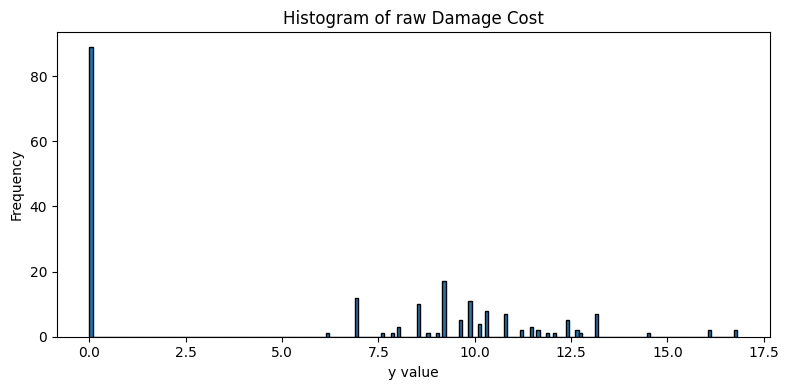

In [10]:
plt.figure(figsize=(8, 4))
plt.hist(df_thunderstorm_wind['damage_property_log'], bins=200, edgecolor='k')
plt.xlabel('y value')
plt.ylabel('Frequency')
plt.title('Histogram of raw Damage Cost')
plt.tight_layout()
plt.show()

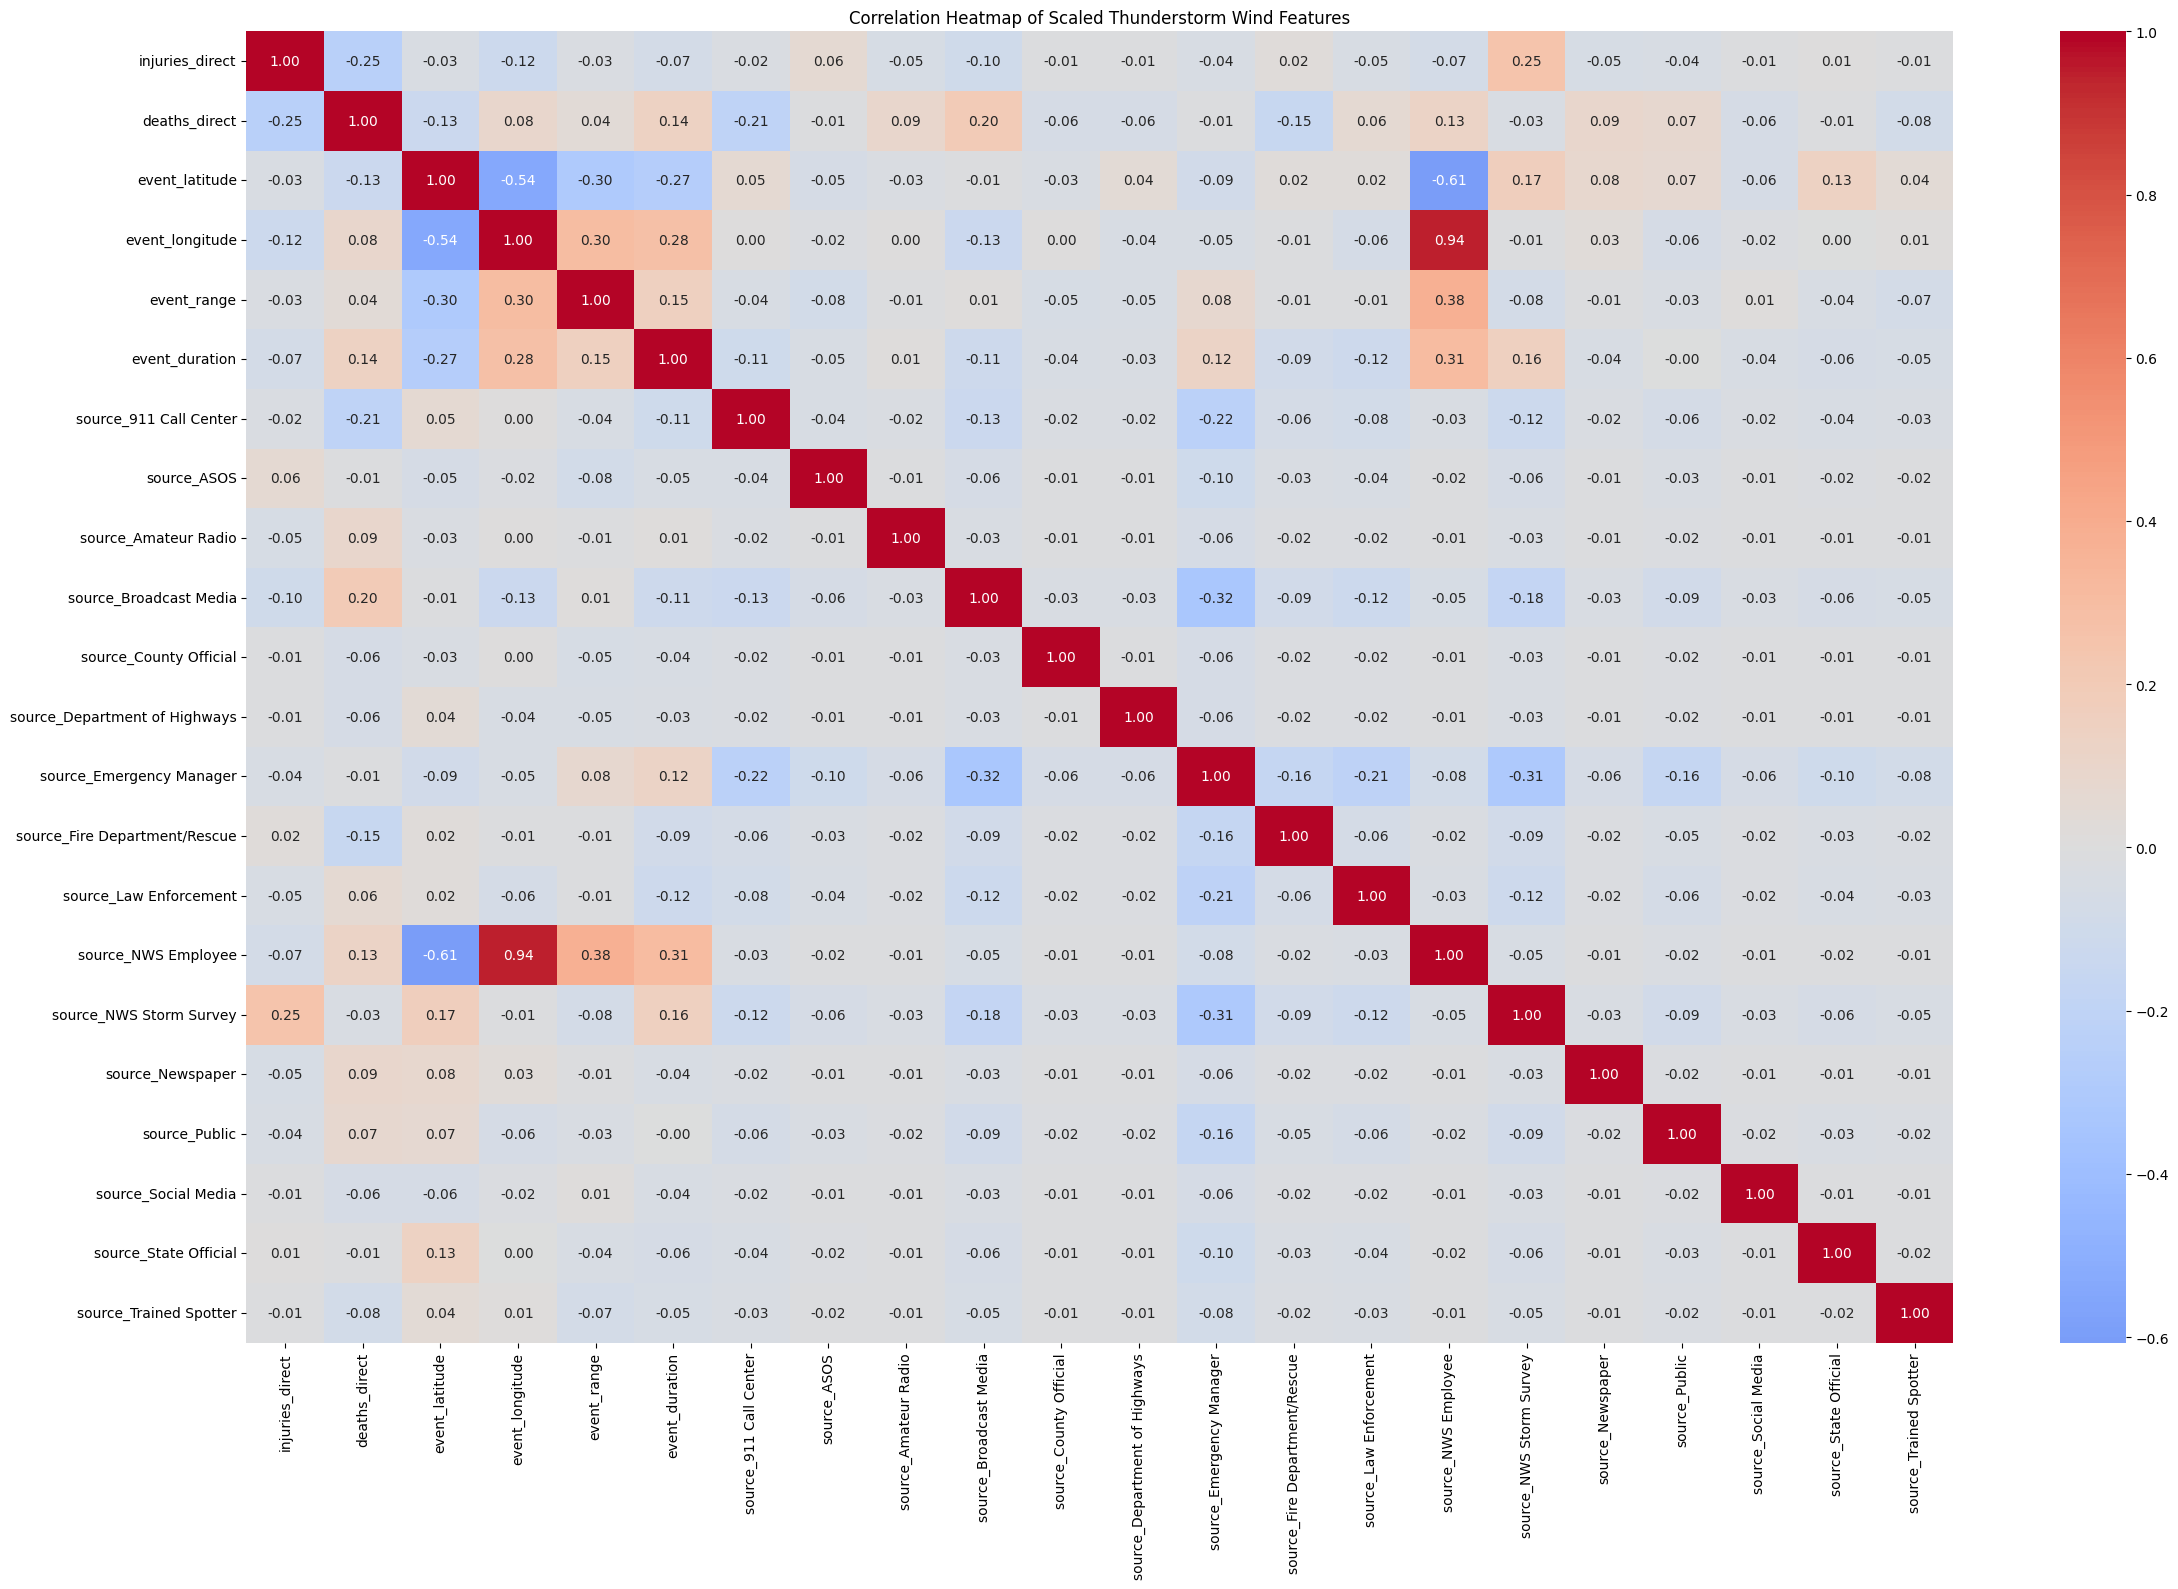

In [11]:
# Compute correlation matrix
corr_matrix = X_train_scaled_thunderstorm_wind.corr()

# Plot heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Scaled Thunderstorm Wind Features")
plt.tight_layout()
plt.show()

# Linear Regression and Random Forest Regressor

In [12]:
# Initialize thunderstorm wind models
thunderstorm_models = {
    "Linear Regression (Thunderstorm Winds)": LinearRegression(),
    "Random Forest Regressor (Thunderstorm Winds)": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train, predict, and evaluate
results_thunderstorm_wind = []
for name, model in thunderstorm_models.items():
    model.fit(X_train_scaled_thunderstorm_wind, y_train_thunderstorm_wind)
    preds = model.predict(X_test_scaled_thunderstorm_wind)
    rmse_wind = np.sqrt(mean_squared_error(y_test_thunderstorm_wind, preds))
    r2_wind = r2_score(y_test_thunderstorm_wind, preds)
    results_thunderstorm_wind.append({
        "Model": name,
        "RMSE": rmse_wind,
        "R² Score": r2_wind
    })

# Show results
results_thunderstorm_wind_df = pd.DataFrame(results_thunderstorm_wind)
print(results_thunderstorm_wind_df)

                                          Model      RMSE  R² Score
0        Linear Regression (Thunderstorm Winds)  5.310690  0.027102
1  Random Forest Regressor (Thunderstorm Winds)  4.525736  0.293449


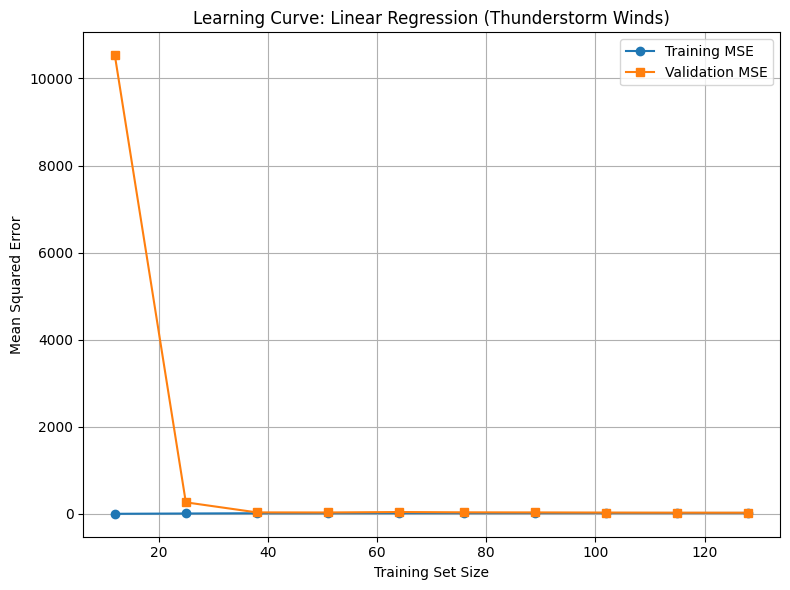

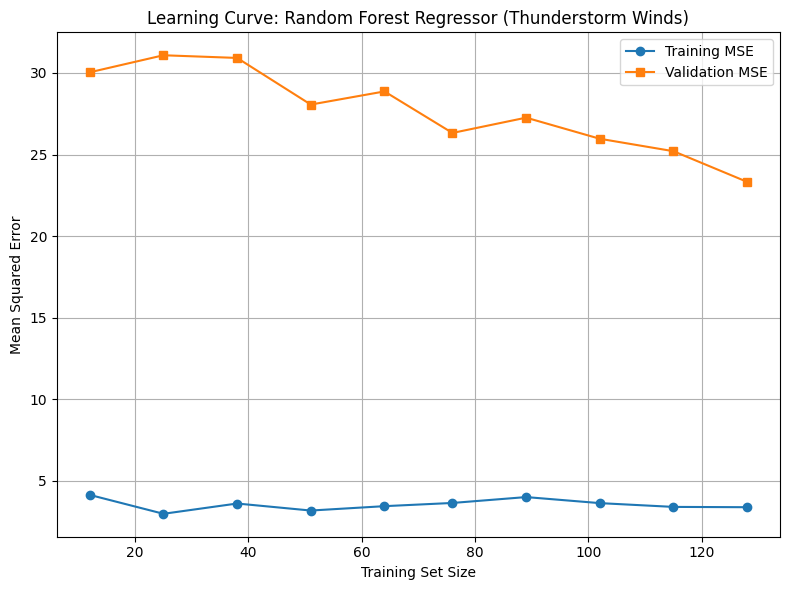

In [13]:
# Plot learning curves using MSE for tornado models
for name, model in thunderstorm_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train_scaled_thunderstorm_wind,  # Tornado features
        y=y_train_thunderstorm_wind,         # Tornado target
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    # Convert negative MSE to positive values
    train_mse_mean = -np.mean(train_scores, axis=1)
    test_mse_mean = -np.mean(test_scores, axis=1)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mse_mean, label="Training MSE", marker='o')
    plt.plot(train_sizes, test_mse_mean, label="Validation MSE", marker='s')
    plt.title(f"Learning Curve: {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


                                      Model     RMSE  R² Score
Random Forest Regressor (thunderstorm wind) 4.525736  0.293449


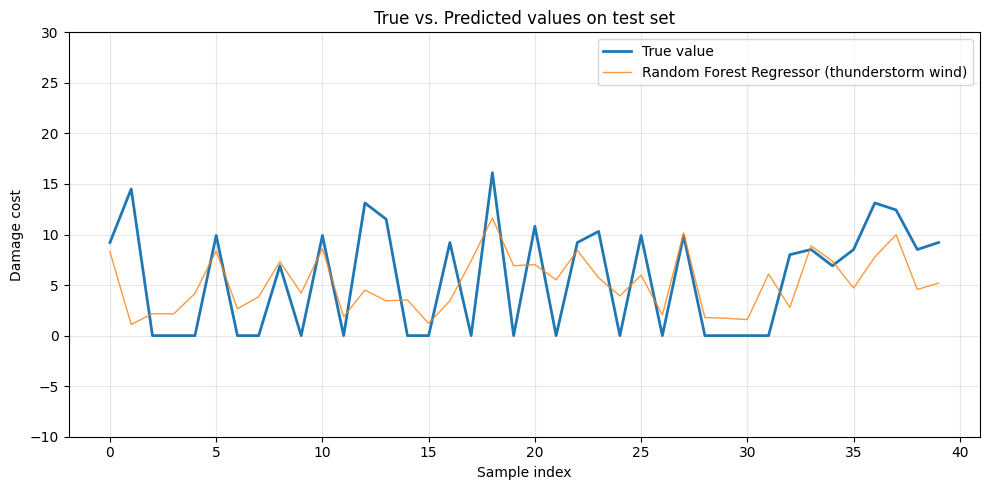

In [14]:
tornado_models = {
    "Random Forest Regressor (thunderstorm wind)": RandomForestRegressor(
        n_estimators=100, random_state=42
    ),
}

pred_dict = {}          # store predictions for later plotting
results_tornado = []    # store metrics for a quick table

for name, model in tornado_models.items():
    model.fit(X_train_scaled_thunderstorm_wind, y_train_thunderstorm_wind)
    preds = model.predict(X_test_scaled_thunderstorm_wind)

    # Save for plotting
    pred_dict[name] = preds

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test_thunderstorm_wind, preds))
    r2   = r2_score(y_test_thunderstorm_wind, preds)

    results_tornado.append({"Model": name, "RMSE": rmse, "R² Score": r2})

# Neat metrics table in case you need it
results_tornado_df = pd.DataFrame(results_tornado)
print(results_tornado_df.to_string(index=False))


plt.figure(figsize=(10, 5))

# Ground‑truth
plt.plot(
    y_test_thunderstorm_wind.values,
    label="True value",
    linewidth=2,
)

# Each model’s curve
for name, preds in pred_dict.items():
    plt.plot(
        preds,
        linewidth=1,
        alpha=0.8,
        label=name,        # legend entry
    )

plt.ylim(-10, 30)                 # keep your original y‑axis limits
plt.xlabel("Sample index")
plt.ylabel("Damage cost")
plt.title("True vs. Predicted values on test set")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
# SAve the model
#rf_model = tornado_models["Random Forest Regressor (Flash Floods)"]

#joblib.dump(rf_model, "models/random_forest_tornado_hail.pkl")   # any filename you like


# Neural Network Regression

In [28]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_t = torch.tensor(X_train_scaled_thunderstorm_wind.values, dtype=torch.float32)
X_test_t  = torch.tensor(X_test_scaled_thunderstorm_wind.values,  dtype=torch.float32)

# scale the target (z‑score)
#y_scaler     = StandardScaler()
##y_train_z    = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
#y_test_z     = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

y_train_t = torch.tensor(y_train_thunderstorm_wind.values, dtype=torch.float32).unsqueeze(1)
y_test_t  = torch.tensor(y_test_thunderstorm_wind.values, dtype=torch.float32).unsqueeze(1)

ds_full = TensorDataset(X_train_t, y_train_t)

# Validation split  (80 % train / 20 % val)
val_frac = 0.2
val_size = int(len(ds_full) * val_frac)
train_size = len(ds_full) - val_size
ds_train, ds_val = random_split(ds_full, [train_size, val_size],
                                generator=torch.Generator().manual_seed(42))

loader_train = DataLoader(ds_train, batch_size=16, shuffle=True)
loader_val   = DataLoader(ds_val,   batch_size=64, shuffle=False)

In [33]:
class MLPRegressor(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)        # linear output (z‑score of y)
        )

    def forward(self, x):
        return self.net(x)

model = MLPRegressor(X_train_t.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)


best_val = np.inf
patience, patience_cnt = 20, 0
n_epochs = 500
step = 0
training_loss = []
val_loss_list = []
for epoch in range(1, n_epochs + 1):
    # --- training step ---
    model.train()
    for xb, yb in loader_train:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        step +=1
        print(f"Epoch: {epoch}, Training Loss step:{step}-MSE:{loss}")
        training_loss.append(loss)

    # --- validation ---
    model.eval()
    with torch.no_grad():
        val_losses = []
        for xb, yb in loader_val:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            val_losses.append(criterion(pred, yb).item())
        val_loss = np.mean(val_losses)
        val_loss_list.append(val_loss)
        

    # early‑stopping logic
    # if val_loss < best_val - 0.0001:
    #     best_val = val_loss
    #     best_state = model.state_dict()
    #     patience_cnt = 0
    # else:
    #     patience_cnt += 1
    #     if patience_cnt >= patience:
    #         print(f"Early stopping at epoch {epoch}")
    #         break


Epoch: 1, Training Loss step:1-MSE:72.73570251464844
Epoch: 1, Training Loss step:2-MSE:32.807979583740234
Epoch: 1, Training Loss step:3-MSE:63.265689849853516
Epoch: 1, Training Loss step:4-MSE:65.97457122802734
Epoch: 1, Training Loss step:5-MSE:44.91010284423828
Epoch: 1, Training Loss step:6-MSE:71.43501281738281
Epoch: 1, Training Loss step:7-MSE:45.851356506347656
Epoch: 1, Training Loss step:8-MSE:46.9724235534668
Epoch: 2, Training Loss step:9-MSE:46.402374267578125
Epoch: 2, Training Loss step:10-MSE:46.92213439941406
Epoch: 2, Training Loss step:11-MSE:30.38304901123047
Epoch: 2, Training Loss step:12-MSE:48.80403137207031
Epoch: 2, Training Loss step:13-MSE:69.0081558227539
Epoch: 2, Training Loss step:14-MSE:63.99241638183594
Epoch: 2, Training Loss step:15-MSE:39.165000915527344
Epoch: 2, Training Loss step:16-MSE:74.36246490478516
Epoch: 3, Training Loss step:17-MSE:52.25674819946289
Epoch: 3, Training Loss step:18-MSE:36.57513427734375
Epoch: 3, Training Loss step:19-MS

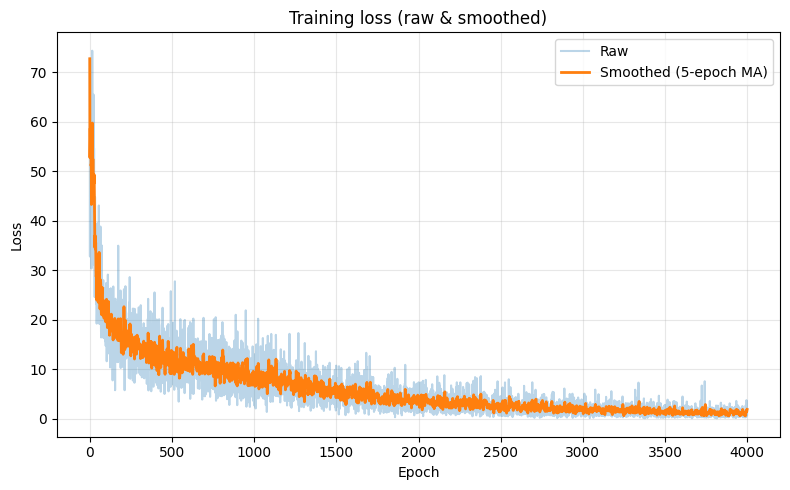

In [34]:
# loss_list may contain CUDA tensors → turn each into a Python float
loss_cpu_training = [float(l.detach().cpu()) if torch.is_tensor(l) else float(l)
            for l in training_loss]

# ── basic curve ─────────────────────────────────────────────────────────
# plt.figure(figsize=(8, 5))
# plt.plot(loss_cpu_training, label='Training loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss (MSE)')
# plt.title('Training loss vs. epoch')
# plt.grid(True, alpha=0.3)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # ── optional: add a 5‑epoch rolling‑average smoother ───────────────────
smooth = pd.Series(loss_cpu_training).rolling(window=5, min_periods=1).mean()
plt.figure(figsize=(8, 5))
plt.plot(loss_cpu_training,  alpha=0.3, label='Raw')
plt.plot(smooth, linewidth=2, label='Smoothed (5‑epoch MA)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss (raw & smoothed)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

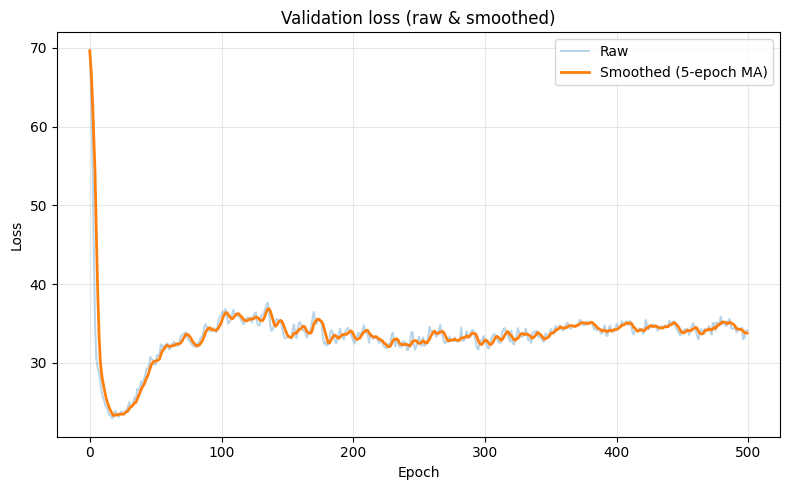

In [35]:
# loss_list may contain CUDA tensors → turn each into a Python float
loss_cpu_val = [float(l.detach().cpu()) if torch.is_tensor(l) else float(l)
            for l in val_loss_list]

# ── basic curve ─────────────────────────────────────────────────────────
# plt.figure(figsize=(8, 5))
# plt.plot(loss_cpu_training, label='Training loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss (MSE)')
# plt.title('Training loss vs. epoch')
# plt.grid(True, alpha=0.3)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # ── optional: add a 5‑epoch rolling‑average smoother ───────────────────
smooth = pd.Series(loss_cpu_val).rolling(window=5, min_periods=1).mean()
plt.figure(figsize=(8, 5))
plt.plot(loss_cpu_val,  alpha=0.3, label='Raw')
plt.plot(smooth, linewidth=2, label='Smoothed (5‑epoch MA)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation loss (raw & smoothed)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
loss_cpu_val

[69.64219665527344,
 64.6984634399414,
 56.470703125,
 45.03314208984375,
 34.91514587402344,
 30.53759765625,
 29.347728729248047,
 28.878143310546875,
 27.560510635375977,
 26.334705352783203,
 25.560592651367188,
 25.204771041870117,
 24.496374130249023,
 24.340370178222656,
 23.785465240478516,
 23.343231201171875,
 23.389108657836914,
 22.958887100219727,
 23.165542602539062,
 23.866764068603516,
 23.812503814697266,
 23.24271011352539,
 23.136274337768555,
 23.480613708496094,
 23.863574981689453,
 23.55542755126953,
 23.627729415893555,
 23.901264190673828,
 24.04901123046875,
 24.405139923095703,
 25.010475158691406,
 24.564407348632812,
 24.46139144897461,
 24.962364196777344,
 25.61067771911621,
 25.296226501464844,
 26.68686866760254,
 26.46945571899414,
 26.879531860351562,
 27.643991470336914,
 27.152225494384766,
 27.88641357421875,
 28.328569412231445,
 29.23820686340332,
 29.2311954498291,
 29.64472007751465,
 30.740678787231445,
 30.4619083404541,
 30.34249496459961,
 

In [37]:
# model.load_state_dict(best_state)

# ── 4.  Evaluate on the test set ─────────────────────────────────────────
model.eval()
with torch.no_grad():
    preds_z = model(X_test_t.to(device)).cpu().numpy().ravel()

#preds = y_scaler.inverse_transform(preds_z.reshape(-1, 1)).ravel()

rmse_nn = np.sqrt(mean_squared_error(y_test_thunderstorm_wind, preds_z))
r2_nn   = r2_score(y_test_thunderstorm_wind, preds)

print(f"PyTorch NN  RMSE: {rmse_nn:,.2f}   R²: {r2_nn:.3f}")

# ── 5.  Add to your results list ─────────────────────────────────────────
results_tornado.append({
    "Model": "Neural Network (PyTorch, Tornado)",
    "RMSE":  rmse_nn,
    "R² Score": r2_nn
})

PyTorch NN  RMSE: 5.84   R²: 0.293


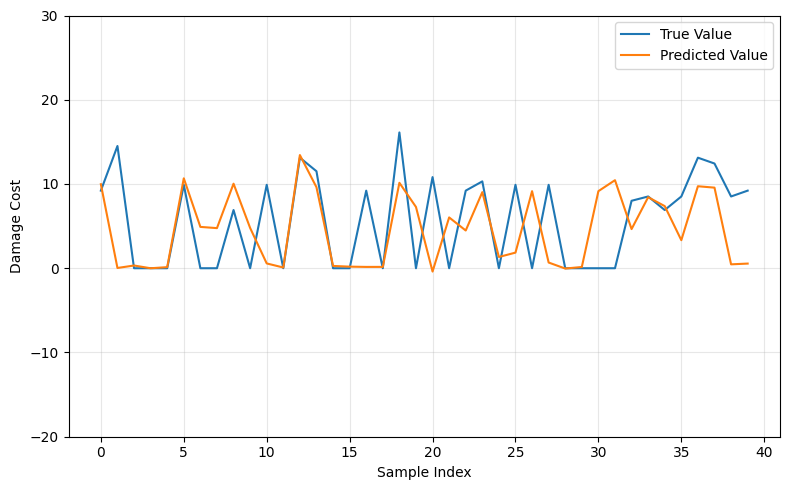

In [38]:
plt.figure(figsize=(8, 5))
plt.plot(y_test_thunderstorm_wind.values,  label='True Value')
plt.plot(preds_z,  label='Predicted Value')
plt.ylim(-20, 30)  
#plt.plot(smooth, linewidth=2, label='Smoothed (5‑epoch MA)')
plt.xlabel('Sample Index')
plt.ylabel('Damage Cost')
#plt.title('Validation loss (raw & smoothed)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
# at the end of training, after your loop:
#torch.save(model.state_dict(), "Models/mlp_regressor_state_dict_flash_flood.pth")

# XGA Boost Regressor

In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [41]:
X_train_scaled_thunderstorm_wind

,injuries_direct,deaths_direct,event_latitude,event_longitude,event_range,event_duration,source_911 Call Center,source_ASOS,source_Amateur Radio,source_Broadcast Media,...,source_Emergency Manager,source_Fire Department/Rescue,source_Law Enforcement,source_NWS Employee,source_NWS Storm Survey,source_Newspaper,source_Public,source_Social Media,source_State Official,source_Trained Spotter
640,-0.640939,1.118558,1.040087,0.285633,-0.070756,-0.479906,-0.297381,-0.138233,-0.079305,-0.430331,...,1.326130,-0.213896,-0.284747,-0.112509,-0.409736,-0.079305,-0.213896,-0.079305,-0.138233,-0.112509
758,-0.120379,-0.707659,0.146060,0.142827,0.162144,-0.479906,-0.297381,-0.138233,-0.079305,2.323790,...,-0.754074,-0.213896,-0.284747,-0.112509,-0.409736,-0.079305,-0.213896,-0.079305,-0.138233,-0.112509
599,-0.120379,-0.707659,1.055113,-0.161288,0.116577,-0.479906,-0.297381,-0.138233,-0.079305,-0.430331,...,1.326130,-0.213896,-0.284747,-0.112509,-0.409736,-0.079305,-0.213896,-0.079305,-0.138233,-0.112509
585,-0.120379,1.118558,1.061273,0.316073,-0.470738,-0.479906,-0.297381,-0.138233,-0.079305,-0.430331,...,-0.754074,-0.213896,-0.284747,-0.112509,2.440599,-0.079305,-0.213896,-0.079305,-0.138233,-0.112509
683,-0.640939,1.118558,-0.398998,-0.385279,1.341837,-0.479906,-0.297381,-0.138233,-0.079305,-0.430331,...,-0.754074,-0.213896,3.511885,-0.112509,-0.409736,-0.079305,-0.213896,-0.079305,-0.138233,-0.112509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,-0.120379,-0.707659,0.821522,0.207738,-0.475801,-0.479906,3.362691,-0.138233,-0.079305,-0.430331,...,-0.754074,-0.213896,-0.284747,-0.112509,-0.409736,-0.079305,-0.213896,-0.079305,-0.138233,-0.112509
575,-0.120379,-0.707659,0.151679,-0.028029,8.247847,-0.479906,-0.297381,-0.138233,-0.079305,-0.430331,...,1.326130,-0.213896,-0.284747,-0.112509,-0.409736,-0.079305,-0.213896,-0.079305,-0.138233,-0.112509
653,-0.640939,1.118558,-0.324706,0.041835,-0.131513,0.161751,-0.297381,-0.138233,12.609520,-0.430331,...,-0.754074,-0.213896,-0.284747,-0.112509,-0.409736,-0.079305,-0.213896,-0.079305,-0.138233,-0.112509
740,-0.640939,1.118558,1.410148,0.472703,-0.582125,0.054808,-0.297381,-0.138233,-0.079305,-0.430331,...,-0.754074,-0.213896,-0.284747,-0.112509,2.440599,-0.079305,-0.213896,-0.079305,-0.138233,-0.112509


In [42]:
xgb_model = XGBRegressor(
    n_estimators=800,        # total boosted trees
    learning_rate=0.03,     # shrinkage (η)
    max_depth=6,            # tree depth
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # feature sampling
    objective="reg:squarederror",
    reg_lambda=1.0,         # L2 regularisation
    random_state=42,
    n_jobs=-1,              # use all CPU cores
)

# Optionally try a log‑target wrapper (similar to TransformedTargetRegressor)
# if you still have huge dynamic‑range issues.

xgb_model.fit(X_train_scaled_thunderstorm_wind, y_train_thunderstorm_wind)

y_pred_xgb = xgb_model.predict(X_test_scaled_thunderstorm_wind)

rmse_xgb = np.sqrt(mean_squared_error(y_test_thunderstorm_wind, y_pred_xgb))
r2_xgb   = r2_score(y_test_thunderstorm_wind, y_pred_xgb)

print(f"XGBoost  RMSE: {rmse_xgb:,.2f}   R²: {r2_xgb:.3f}")


results_tornado.append({
    "Model": "XGBoost Regressor (Tornado)",
    "RMSE":  rmse_xgb,
    "R² Score": r2_xgb
})


XGBoost  RMSE: 4.85   R²: 0.188


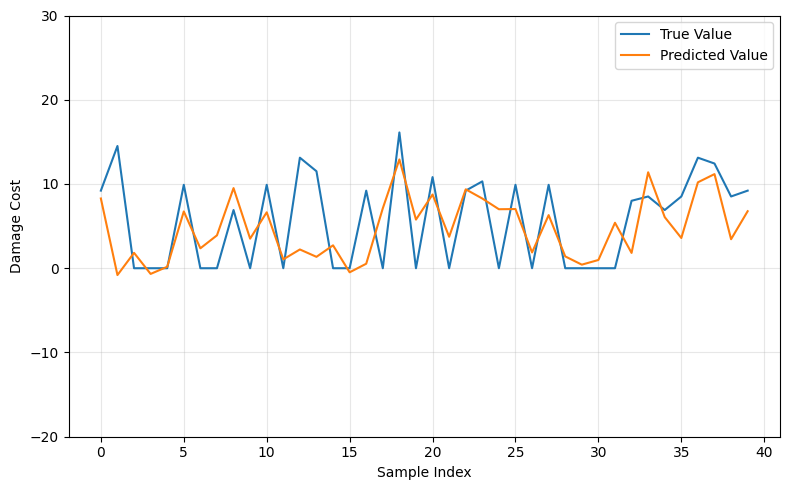

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(y_test_thunderstorm_wind.values,  label='True Value')
plt.plot(y_pred_xgb,  label='Predicted Value')
plt.ylim(-20, 30)  
#plt.plot(smooth, linewidth=2, label='Smoothed (5‑epoch MA)')
plt.xlabel('Sample Index')
plt.ylabel('Damage Cost')
#plt.title('Validation loss (raw & smoothed)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [44]:

#joblib.dump(xgb_model, "Models/xgb_tornado_flash_flood.joblib")

# Support Vector Regression

In [45]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

In [46]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf"))
])

svr_ttr = TransformedTargetRegressor(
    regressor=pipe,
    func=np.log1p,
    inverse_func=np.expm1
)

svr_ttr.fit(X_train_scaled_thunderstorm_wind, y_train_thunderstorm_wind)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('scaler',
                                                      StandardScaler()),
                                                     ('svr', SVR())]))

In [47]:
y_pred = svr_ttr.predict(X_test_scaled_thunderstorm_wind)     # already inverse‑transformed
rmse_svr   = np.sqrt(mean_squared_error(y_test_thunderstorm_wind, y_pred))
r2_svr     = r2_score(y_test_thunderstorm_wind, y_pred)

In [48]:
print(f"SVR  RMSE: {rmse_svr:,.2f}   R²: {r2_svr:.3f}")

SVR  RMSE: 6.48   R²: -0.447


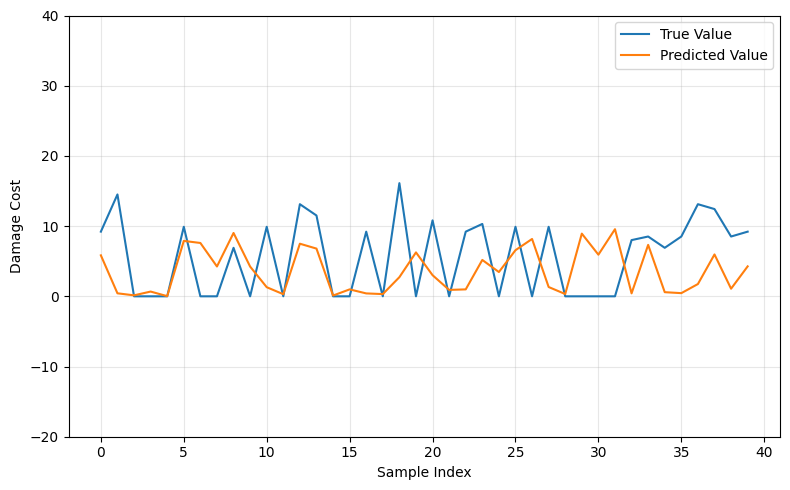

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(y_test_thunderstorm_wind.values,  label='True Value')
plt.plot(y_pred,  label='Predicted Value')
plt.ylim(-20, 40)  
#plt.plot(smooth, linewidth=2, label='Smoothed (5‑epoch MA)')
plt.xlabel('Sample Index')
plt.ylabel('Damage Cost')
#plt.title('Validation loss (raw & smoothed)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
joblib.dump(svr_ttr, "Models/svr_pipeline_flash_floods.joblib")

['Models/svr_pipeline_flash_floods.joblib']

# Adaboost Regressor

In [51]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
ada_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ada", AdaBoostRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )),
])

ada_ttr = TransformedTargetRegressor(
    regressor=ada_pipe,
    func=np.log1p,
    inverse_func=np.expm1
)

ada_ttr.fit(X_train_scaled_thunderstorm_wind, y_train_thunderstorm_wind)
y_pred_ada = ada_ttr.predict(X_test_scaled_thunderstorm_wind)   # inverse‑transformed
rmse_ada = np.sqrt(mean_squared_error(y_test_thunderstorm_wind, y_pred_ada))
r2_ada   = r2_score(y_test_thunderstorm_wind, y_pred_ada)

print(f"AdaBoost   RMSE: {rmse_ada:.2f}   R²: {r2_ada:.3f}")

AdaBoost   RMSE: 5.68   R²: -0.113


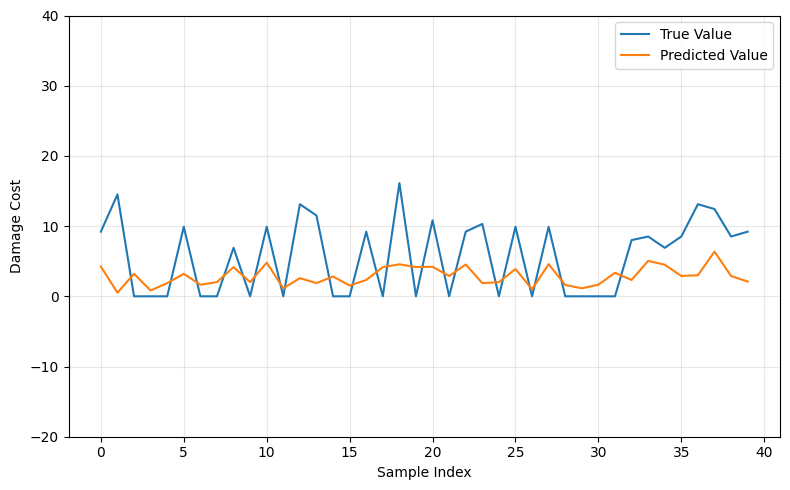

In [53]:
plt.figure(figsize=(8, 5))
plt.plot(y_test_thunderstorm_wind.values,  label='True Value')
plt.plot(y_pred_ada,  label='Predicted Value')
plt.ylim(-20, 40)  
#plt.plot(smooth, linewidth=2, label='Smoothed (5‑epoch MA)')
plt.xlabel('Sample Index')
plt.ylabel('Damage Cost')
#plt.title('Validation loss (raw & smoothed)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
#joblib.dump(ada_ttr, "Models/ada_pipeline_flash_floods.joblib")

# KNN Regressor

In [55]:
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(
        n_neighbors=5,
        weights="uniform",
        n_jobs=-1
    )),
])

knn_ttr = TransformedTargetRegressor(
    regressor=knn_pipe,
    func=np.log1p,
    inverse_func=np.expm1
)

knn_ttr.fit(X_train_scaled_thunderstorm_wind, y_train_thunderstorm_wind)
y_pred_knn = knn_ttr.predict(X_test_scaled_thunderstorm_wind)  # inverse‑transformed
rmse_knn = np.sqrt(mean_squared_error(y_test_thunderstorm_wind, y_pred_knn))
r2_knn   = r2_score(y_test_thunderstorm_wind, y_pred_knn)

print(f"KNN        RMSE: {rmse_knn:.2f}   R²: {r2_knn:.3f}")

KNN        RMSE: 6.04   R²: -0.258


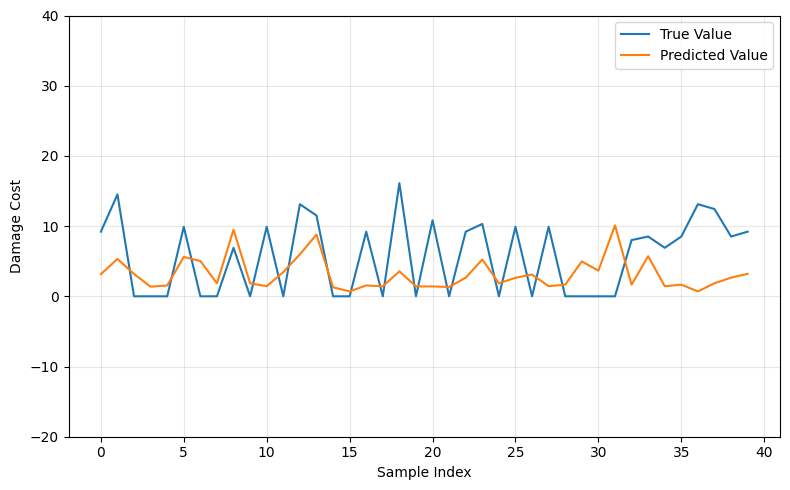

In [56]:
plt.figure(figsize=(8, 5))
plt.plot(y_test_thunderstorm_wind.values,  label='True Value')
plt.plot(y_pred_knn,  label='Predicted Value')
plt.ylim(-20, 40)  
#plt.plot(smooth, linewidth=2, label='Smoothed (5‑epoch MA)')
plt.xlabel('Sample Index')
plt.ylabel('Damage Cost')
#plt.title('Validation loss (raw & smoothed)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()